In [1]:
# Preprocessing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss

# Warning
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing Scrapped Dataset:

In [2]:
#Reading csv file 
df = pd.read_csv("R_P.csv")
df

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Ok laptop if u r not using more than 5-6 hrs a...,\n &nbsp;This laptop is good only if u use a ...,2.0 out of 5 stars
1,1,No fingerprint reader,\n Fingerprint reader is a complete lie....no...,3.0 out of 5 stars
2,2,Built quality and software probleam.,\n I found some software probleam in this lap...,1.0 out of 5 stars
3,3,Sleekest Laptop at this price,\n Best laptop at this price. I have never se...,5.0 out of 5 stars
4,4,Best laptop at this price,\n &nbsp;It's a great product go for it\n,5.0 out of 5 stars
...,...,...,...,...
43776,43776,Worth every penny,This watch is sooo awesome 😎\nI realy like the...,5
43777,43777,Terrific,best on this price 👏 👌,5
43778,43778,Pretty good,Nice one,4
43779,43779,Classy product,Very good product must buy at very least cost....,5


dataset we have about 43781 rows and 4 columns

# Exploratory Data Analysis [EDA]:


Since Unnamed: 0 is the index column of csv file so let's drop that column as it will not help us in our predictions.

In [3]:
# Dropping unnecessary column
df.drop(columns = 'Unnamed: 0',inplace = True)

In [4]:
# Checking the shape of the dataset
df.shape

(43781, 3)

In [5]:
# Checking the null values of the dataset
df.isnull().sum()

Review_Title    5438
Review_Text     5234
Ratings         5437
dtype: int64

So we have a huge number of nan values in the dataset. Let's replace them using imputation methods

In [6]:
# Checking the column names in the dataset
df.columns

Index(['Review_Title', 'Review_Text', 'Ratings'], dtype='object')

In [7]:
# Let's check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43781 entries, 0 to 43780
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  38343 non-null  object
 1   Review_Text   38547 non-null  object
 2   Ratings       38344 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


By observing the info we can say that there are some null values in the dataset and all the columns are of object data type which means all the entries are string entries

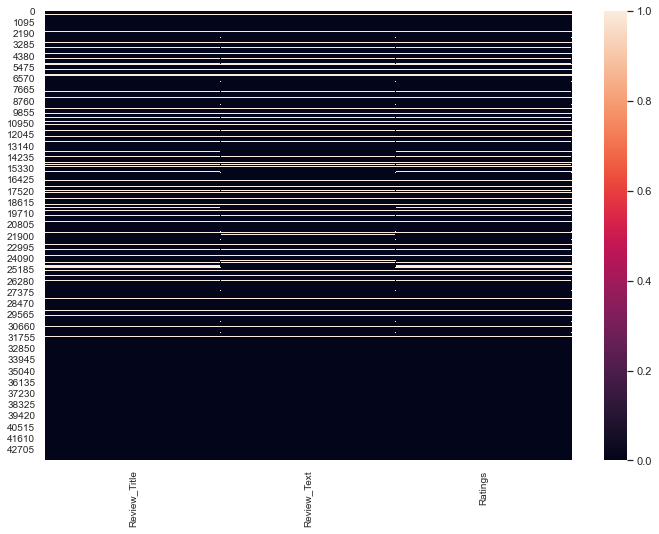

In [8]:
# Let's visualize the null values clearly in dataset using heat map
sns.set(rc={'figure.figsize':(11.8,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

# Replacing nan values using imputation method:

In [9]:
#Checking the mode of Review_Title column
df["Review_Title"].mode()

0    Wonderful
dtype: object

So the highest occuring Review_Title is Wonderful, we have to replace the nan values in Review_Title column with it's mode.

In [10]:
#Checking the mode of Review_Text column
df["Review_Text"].mode()

0    Good
dtype: object

So the highest occuring Review_Text is Good, we have to replace the nan values in Review_Text column with it's mode

In [11]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5                     7499
5.0 out of 5 stars    6235
1.0 out of 5 stars    5687
4.0 out of 5 stars    5364
3.0 out of 5 stars    4859
2.0 out of 5 stars    4417
4                     2460
3                      785
1                      768
2                      270
Name: Ratings, dtype: int64

Since the highes count in Ratings column is for 5 followed by 5.0 out of 5 starts and they both are same so it is clear the mode for Ratings column is 5.

In [12]:
#Checking the mode
df["Ratings"].mode()

0    5
dtype: object

In [13]:
#Replacing nan values with there mode as all the columns are categorical
df["Review_Title"] = df["Review_Title"].fillna(df["Review_Title"].mode()[0])
df["Review_Text"] = df["Review_Text"].fillna(df["Review_Text"].mode()[0])
df["Ratings"] = df["Ratings"].fillna(df["Ratings"].mode()[0])

In [14]:
df.isnull().sum()

Review_Title    0
Review_Text     0
Ratings         0
dtype: int64

Now successfully we have replaced all the nan values using imputation method.

In [15]:
# Checking the unique value count of target column
df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '5', '4', '3', '1',
       '2'], dtype=object)

Looking the above entries in target column we came to know that we need to replace the string entries to there respective values(stars).

In [16]:
# Replacing the string entries in target column
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')

In [17]:
df['Ratings'].unique()

array([2, 3, 1, 5, 4])

Now the target column looks good for our analysis.

# Now let's combine Review_Title and Review_Text to make a single column Review:

In [18]:
# Combining Review text and title
df['Review'] = df['Review_Title'].map(str)+' '+df['Review_Text']

In [19]:
#let's have a look into our dataset
df

,Review_Title,Review_Text,Ratings,Review
0,Ok laptop if u r not using more than 5-6 hrs a...,\n &nbsp;This laptop is good only if u use a ...,2,Ok laptop if u r not using more than 5-6 hrs a...
1,No fingerprint reader,\n Fingerprint reader is a complete lie....no...,3,No fingerprint reader \n Fingerprint reader i...
2,Built quality and software probleam.,\n I found some software probleam in this lap...,1,Built quality and software probleam. \n I fou...
3,Sleekest Laptop at this price,\n Best laptop at this price. I have never se...,5,Sleekest Laptop at this price \n Best laptop ...
4,Best laptop at this price,\n &nbsp;It's a great product go for it\n,5,Best laptop at this price \n &nbsp;It's a gre...
...,...,...,...,...
43776,Worth every penny,This watch is sooo awesome 😎\nI realy like the...,5,Worth every penny This watch is sooo awesome 😎...
43777,Terrific,best on this price 👏 👌,5,Terrific best on this price 👏 👌
43778,Pretty good,Nice one,4,Pretty good Nice one
43779,Classy product,Very good product must buy at very least cost....,5,Classy product Very good product must buy at v...


In [20]:
# Dropping unnecessary column
df.drop(columns = 'Review_Title',inplace = True)
df.drop(columns = 'Review_Text',inplace = True)

# Let's have a look into our Review column and see first 2 entries how the data looks:

In [21]:
# Checking data of first row in Review column
df['Review'][0]

"Ok laptop if u r not using more than 5-6 hrs a day \n  &nbsp;This laptop is good only if u use a cooling pad  or else it get over heated when that happens it turns black and switchtches off so it's not good<br>Even for a student if ur attending classes more than 5-6 hrs it gets heated stuck and shuts down also it's not too fast initially it was very fast but then later became slow usable ram is 5.9 gb not 8gb also only 470gb storage if even the data Is just 30gb out of 470 it gets slow it is not for gaming<br>As soon as u update to windows 11 the laptop gets worse but at this rate it is ok and does its job there is a bit of anti glare not so effective screen brightness is not so good and charge holds good for 2 hrs max with internet<br>It's mic and sound is worst<br>For this rate u could go for someother laptops<br>But still it's managable<br>It boots fast ⏩ and the product is flimsy<br>and not sturdy the track pad is gone after 1 week even after using external mouse<br>Warranty is fo

In [22]:
# Checking data of second row in Review column
df['Review'][1]

'No fingerprint reader \n  Fingerprint reader is a complete lie....nothing except a power button is available........THIS IS TRUE...i m not a paid reviewer.........took it in 51990 from flipkart\n'

# Text Processing:

In [23]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [24]:
# Changing all words to there Lowercase
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

# Let's have a look into our text again:

In [25]:
# Checking data of first row in Review column again
df['Review'][0]

'ok laptop if u r not using more than 56 hrs a day    nbspthis laptop is good only if u use a cooling pad  or else it get over heated when that happens it turns black and switchtches off so it is not good even for a student if ur attending classes more than 56 hrs it gets heated stuck and shuts down also it is not too fast initially it was very fast but then later became slow usable ram is 59 gb not 8gb also only 470gb storage if even the data is just 30gb out of 470 it gets slow it is not for gaming as soon as u update to windows 11 the laptop gets worse but at this rate it is ok and does its job there is a bit of anti glare not so effective screen brightness is not so good and charge holds good for 2 hrs max with internet it is mic and sound is worst for this rate u could go for someother laptops but still it is managable it boots fast  and the product is flimsy and not sturdy the track pad is gone after 1 week even after using external mouse warranty is for 1 year and antivirus is f

In [26]:
# Checking data of second row in Review column again
df['Review'][1]

'no fingerprint reader    fingerprint reader is a complete lienothing except a power button is availablethis is truei m not a paid reviewertook it in 51990 from flipkart '

# Removing StopWords:

In [27]:
# Removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [28]:
# Checking the text data again
df['Review'][0]

'ok laptop u r using 56 hrs day nbspthis laptop good u use cooling pad else get heated happens turns black switchtches good even student ur attending classes 56 hrs gets heated stuck shuts also fast initially fast later became slow usable ram 59 gb 8gb also 470gb storage even data 30gb 470 gets slow gaming soon u update windows 11 laptop gets worse rate ok job bit anti glare effective screen brightness good charge holds good 2 hrs max internet mic sound worst rate u could go someother laptops still managable boots fast product flimsy sturdy track pad gone 1 week even using external mouse warranty 1 year antivirus 1 month trial overall laptop best market cons things good laptop'

In [29]:
# Checking the text data again
df['Review'][1]

'fingerprint reader fingerprint reader complete lienothing except power button availablethis truei paid reviewertook 51990 flipkart'

# Lemmatization:

In [30]:
#Initialising lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
from nltk.corpus import wordnet

In [31]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [32]:
#Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [33]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [34]:
#df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [35]:
# Checking the text data again
df['Review'][0]

'ok laptop u r using 56 hrs day nbspthis laptop good u use cooling pad else get heated happens turns black switchtches good even student ur attending classes 56 hrs gets heated stuck shuts also fast initially fast later became slow usable ram 59 gb 8gb also 470gb storage even data 30gb 470 gets slow gaming soon u update windows 11 laptop gets worse rate ok job bit anti glare effective screen brightness good charge holds good 2 hrs max internet mic sound worst rate u could go someother laptops still managable boots fast product flimsy sturdy track pad gone 1 week even using external mouse warranty 1 year antivirus 1 month trial overall laptop best market cons things good laptop'

In [36]:
# Checking the text data again
df['Review'][1]

'fingerprint reader fingerprint reader complete lienothing except power button availablethis truei paid reviewertook 51990 flipkart'

# Text Normalization - Standardization:

In [37]:
#Noice removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [38]:
df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [39]:
# Checking the text data again
df['Review'][0]

'ok laptop u r using  hrs day nbspthis laptop good u use cooling pad else get heated happens turns black switchtches good even student ur attending classes  hrs gets heated stuck shuts also fast initially fast later became slow usable ram  gb gb also gb storage even data gb  gets slow gaming soon u update windows  laptop gets worse rate ok job bit anti glare effective screen brightness good charge holds good  hrs max internet mic sound worst rate u could go someother laptops still managable boots fast product flimsy sturdy track pad gone  week even using external mouse warranty  year antivirus  month trial overall laptop best market cons things good laptop'

In [40]:
# Checking the text data again
df['Review'][1]

'fingerprint reader fingerprint reader complete lienothing except power button availablethis truei paid reviewertook  flipkart'

# Visualization:

In [41]:
# Creating column for word counts in the text
df['Review_WordCount'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,121,ok laptop u r using hrs day nbspthis laptop g...
1,15,fingerprint reader fingerprint reader complete...
2,15,built quality software probleam found software...
3,34,sleekest laptop price best laptop price never ...
4,7,best laptop price nbspit great product go


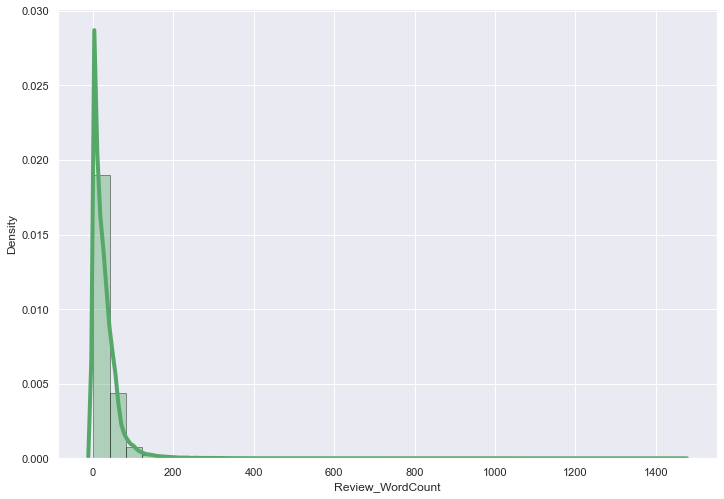

In [42]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'g',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

By observing the histogram we can clearly see that most of our text is having the number of words in the range of 0 to 200, But some of the reviews are too lengthy which may act like outliers in our data

# Character count:

In [43]:
# Creating column for character counts in the text
df['Review_ChaCount'] = df['Review'].str.len()
df[['Review_ChaCount','Review']].head()

,Review_ChaCount,Review
0,663,ok laptop u r using hrs day nbspthis laptop g...
1,125,fingerprint reader fingerprint reader complete...
2,119,built quality software probleam found software...
3,222,sleekest laptop price best laptop price never ...
4,41,best laptop price nbspit great product go


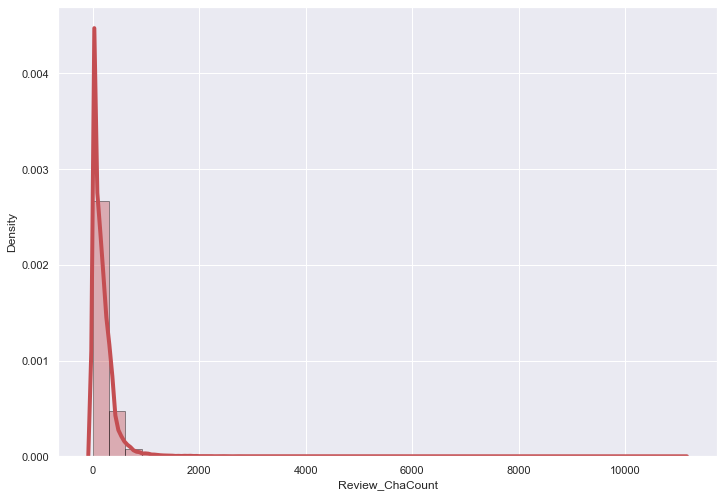

In [44]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'r',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of Review text, which is quite similar to the histogram of word count.

# Removing Outliers:

In [45]:
#Checking the shape of the dataset
df.shape

(43781, 4)

In [46]:
# Applying zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Review_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(43124, 4)

# Plotting histograms for word count and character counts again after removing outliers:

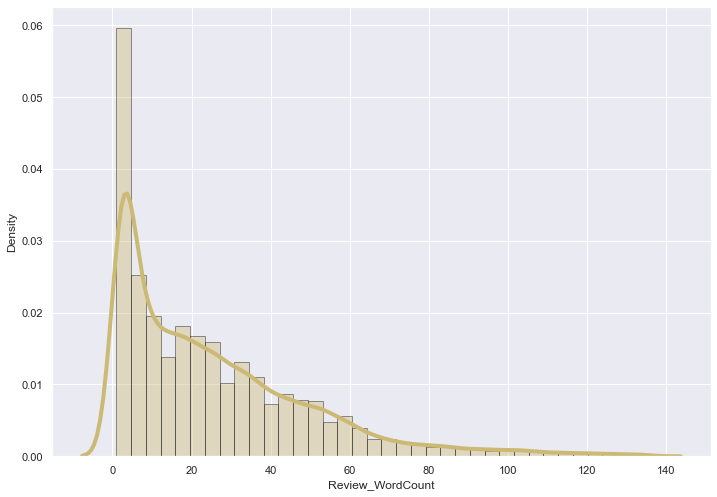

In [47]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

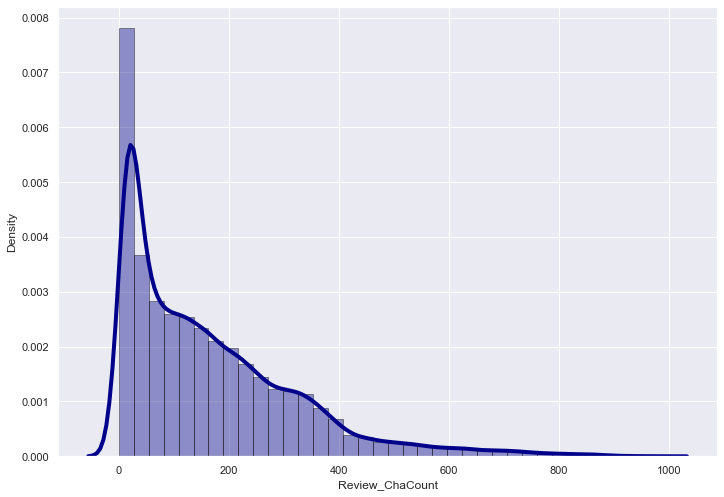

In [48]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

After plotting histograms for word counts and character counts and after removing outliers we can see we are left out with good range of number of words and characters.

# Top 30 most frequently occuring words:

In [49]:
#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

In [50]:
#function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

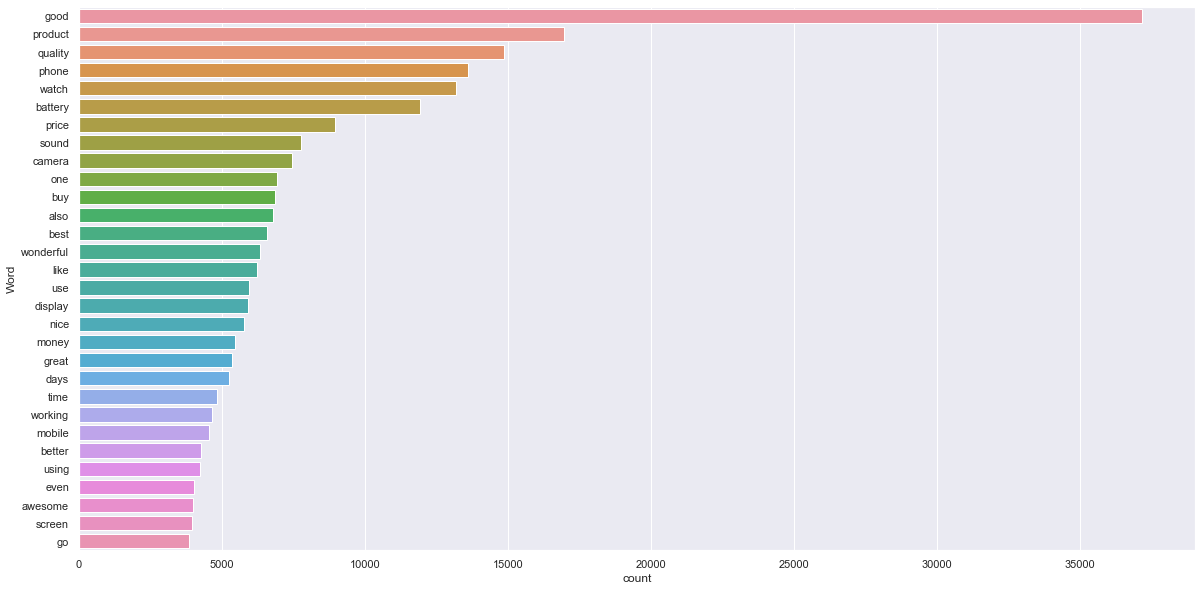

In [51]:
freq_words(df['Review'])

By seeing the above plot we can see that Good, prodout, quality......are occurring frequently.

# Top 30 Rare words:

In [52]:
#function to plot least frequent terms
def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

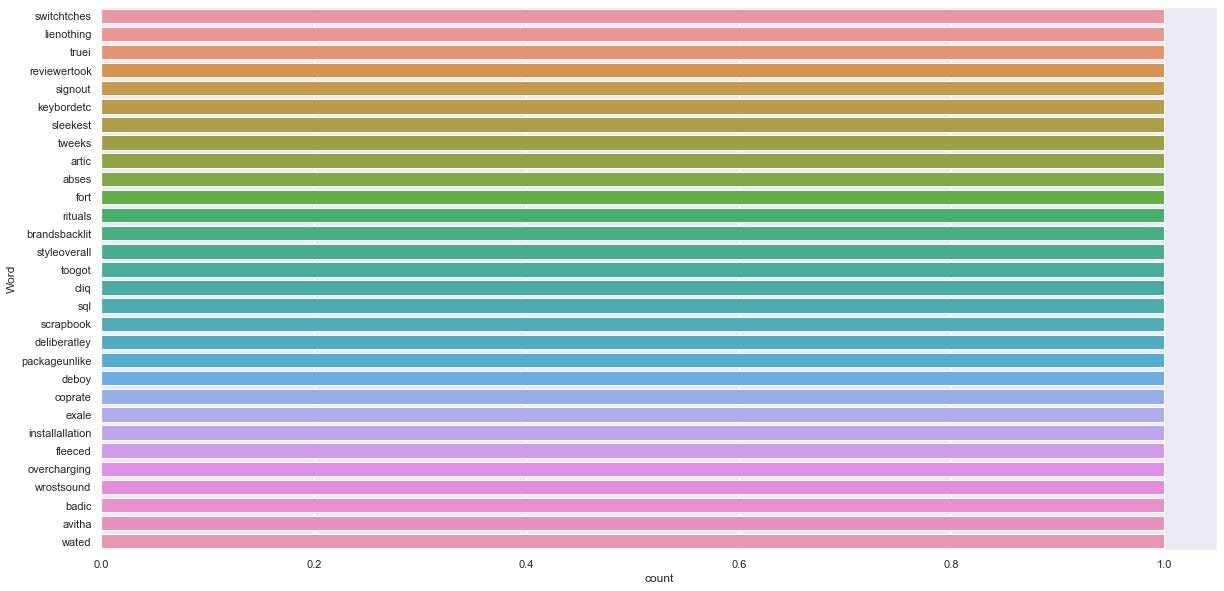

In [53]:
rare_words(df['Review'])

Above list of words are have rare occurance in Review

# Model building evaluation

In [55]:
# Separating feature and label
x = df['Review']
y = df['Ratings']

# Converting text data into vectors using Tfidf Vectorizer:

In [56]:
#using the n_gram tfidf vectorizer(Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [57]:
#Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [58]:
#we will combine both word vectors and character vectors as input for our model
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

# Splitting the data into train and test:

In [59]:
# Splitting train and test data
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

# Data Balancing:

In [60]:
#lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (32343, 150000)
x_test (10781, 150000)
y_train (32343,)
y_test (10781,)


In [61]:
#Checking the value counts of Ratings column
y.value_counts()

5    18935
4     7639
1     6390
3     5546
2     4614
Name: Ratings, dtype: int64

In [62]:
#Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 14200, 4: 5753, 1: 4754, 3: 4149, 2: 3487})


In [63]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 37633, 2: 37633, 3: 37633, 4: 37633, 5: 37633})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 14200, 4: 5753, 1: 4754, 3: 4149, 2: 3487})
The number of classes after fit Counter({2: 37633, 5: 37633, 4: 37633, 3: 37633, 1: 37633})


In [64]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 37633, 2: 37633, 3: 37633, 4: 37633, 5: 37633})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 14200, 4: 5753, 1: 4754, 3: 4149, 2: 3487})
The number of classes after fit Counter({2: 37633, 5: 37633, 4: 37633, 3: 37633, 1: 37633})


In [65]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [66]:
# defining the algorithms
rf = RandomForestClassifier()
DTC = DecisionTreeClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
bnb = BernoulliNB()
sgd = SGDClassifier()

In [67]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train_ns,y_train_ns)
    y_pred = model.predict(x_train_ns)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

In [68]:
# Running multiple algorithms
for model in [lr,svc,DTC,sgd,rf]:
    BuiltModel(model)

******************************LogisticRegression******************************
Accuracy Score: 68.10128930525924
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.67      0.69      0.68      1636
           2       0.40      0.40      0.40      1127
           3       0.44      0.47      0.46      1397
           4       0.55      0.63      0.59      1886
           5       0.90      0.83      0.86      4735

    accuracy                           0.68     10781
   macro avg       0.59      0.60      0.60     10781
weighted avg       0.69      0.68      0.69     10781

Confusion Matrix : 
 [[1136  291  147   41   21]
 [ 308  449  235  110   25]
 [ 158  244  660  256   79]
 [  42   81  276 1180  307]
 [  44   48  169  557 3917]]

******************************LinearSVC******************************
Accuracy Score: 68.23114738892497
---------------------------------------------------
C

# Cross validation score:

In [69]:
# Defning function cross_val to find cv score of models
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score :", scores)

In [74]:
for model in [lr,svc,DTC,sgd,rf]:
    cross_val (model)

******************************LogisticRegression******************************
Cross validation score : 59.950444986217065
******************************LinearSVC******************************
Cross validation score : 58.86521662502546
******************************DecisionTreeClassifier******************************
Cross validation score : 50.927553170680554
******************************SGDClassifier******************************
Cross validation score : 60.06634942720653
******************************RandomForestClassifier******************************
Cross validation score : 58.5613730104476


# HyperParameter Tuning:

In [75]:
# let's selects different parameters for tuning
grid_params = {
                'penalty':['l2','l1','elasticnet'],
                'loss':['hinge','squared_hinge'],
                'n_jobs':[-1,1]
                }

In [76]:
# Training the model with the given parameters using GridSearchCV
GCV =  GridSearchCV(sgd, grid_params, cv = 3, scoring='accuracy',n_jobs=-1,verbose=2)

In [77]:
GCV.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'loss': ['hinge', 'squared_hinge'], 'n_jobs': [-1, 1],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy', verbose=2)

In [78]:
# Printing the best parameters found by GridSearchCV
GCV.best_params_

{'loss': 'hinge', 'n_jobs': -1, 'penalty': 'l2'}

# Final Model:

In [79]:
# Training our final model with above best parameters
model = SGDClassifier(loss = 'squared_hinge', n_jobs = -1, penalty = 'l1')
model.fit(x_train_ns,y_train_ns) #fitting data to model
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)*100

# Printing accuracy score
print("Accuracy Score :", accuracy)

# Printing Confusion matrix
print(f"\nConfusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

# Printing Classification report
print(f"\nCLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score : 63.89017716352843

Confusion Matrix : 
 [[1014  302  162   96   62]
 [ 297  370  238  136   86]
 [ 173  238  546  265  175]
 [  68  108  253 1014  443]
 [  69   75  200  447 3944]]


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.63      0.62      0.62      1636
           2       0.34      0.33      0.33      1127
           3       0.39      0.39      0.39      1397
           4       0.52      0.54      0.53      1886
           5       0.84      0.83      0.84      4735

    accuracy                           0.64     10781
   macro avg       0.54      0.54      0.54     10781
weighted avg       0.64      0.64      0.64     10781



# Model Saving:

In [80]:
import joblib
joblib.dump(model,"Ratings_RP.pkl")

['Ratings_RP.pkl']

Finally I have saved the model into .pkl file.